# Premise:

I am a teacher wanting to check how well my students are doing and who needs some help. I I want to predict their final exam score, and I have the following data:

- their last three exam scores

- the final exam score from my class last semester

I hope my predictions get within 5 points of their actual, future final exam grade.

### Step 1: Grab My Tools from My Toolbox

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pydataset import data
import env # my file in VS code in this folder


### Step 2: Acquire the Data

In [2]:
df = pd.read_csv("student_grades.csv")

### Step 3: Sample and Summarize

In [3]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97


In [4]:
df.shape

(104, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
student_id     104 non-null int64
exam1          103 non-null float64
exam2          104 non-null int64
exam3          104 non-null object
final_grade    104 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


### After looking over things, here's what I notice:

- exam 1 has a null value (If there's 104 columns, it should NOT read 103)

- exam 1 should be changed to an int64 because a grade's a grade, no decimal places

- exam 3 seems to have some odd value, because it should be a type int64 but came back (was "read in") as an 'object'.  We need to find that value

- because this data set is so small, dropping a value altogether would be stupid, so we can't go that route...

### Let's find that null value by counting the missing value in each column and finding out what that type that missing value is returning:

In [6]:
# Count the missing values in each column

print(df.isnull().sum())

student_id     0
exam1          1
exam2          0
exam3          0
final_grade    0
dtype: int64


In [7]:
# Now that we know where the missing value isDouble-check to make sure it is the 'exam1' column that has the null value and 
# what that null-value is 

print(df.columns[df.isnull().any()])

Index(['exam1'], dtype='object')


### Now find the odd value in exam 3:

In [8]:
# Check by .value_counts() to return a Series counting the number of unique values
# I am telling it to 'sort' in 'ascending' order - as I move down the list,
# the number of occurences increases

df.exam3.value_counts(sort=True, ascending=True)

       1
70     8
95     8
87     8
85     8
94     8
79     8
86     8
75    15
78    16
96    16
Name: exam3, dtype: int64

In [13]:
# We want to replace that empty value with a dollar sign:

df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [14]:
# Now verify the empty string - that first one in value_counts() - has been replaced 
# by a null

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
student_id     104 non-null int64
exam1          103 non-null float64
exam2          104 non-null int64
exam3          103 non-null object
final_grade    104 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


#### - Because exam 3 reads '104' instead of the original '103,' I know the string value has been replaced by a null-value

### Drop all observations with missing values and update the data types to int64

In [15]:
df = df.dropna().astype('int')

In [16]:
df.describe()

,student_id,exam1,exam2,exam3,final_grade
count,102.000000,102.000000,102.000000,102.000000,102.000000
mean,53.313725,78.833333,77.500000,84.294118,81.970588
std,29.886909,14.167375,10.297313,8.736617,10.833991
min,1.000000,57.000000,65.000000,70.000000,65.000000
25%,28.250000,70.000000,70.000000,78.000000,72.000000
50%,53.500000,79.000000,75.000000,85.000000,81.000000
75%,78.750000,92.000000,89.000000,94.000000,93.000000
max,104.000000,100.000000,93.000000,96.000000,97.000000


#### In the df above, we now see exam3.  I just ran the first couple of lines in another notebook, and when I df.describe( ) on that one, there is NO exam3 column.  Now, we have it.

### Now take a look at the inofrmation to see the distribution, skew, outliers, and unit scale using matplotlib

- We're looping through each of the numeric columns of interest and showing the distribution of each on a separate subplot

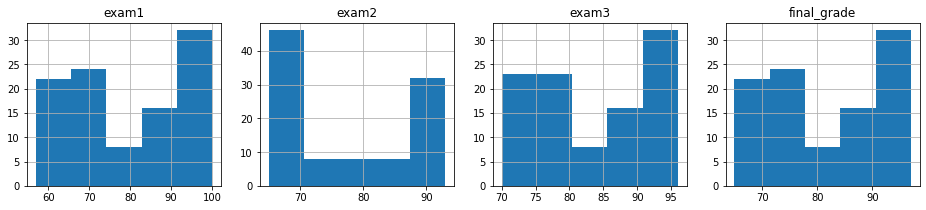

In [18]:
plt.figure(figsize=(16, 3))

for i, col in enumerate(['exam1', 'exam2', 'exam3', 'final_grade']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df[col]  
    plt.subplot(1,4, plot_number)
    plt.title(col)
    series.hist(bins=5)

#### Now take a look at things in a seaborn boxplot:

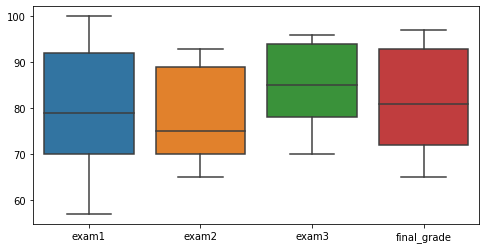

In [19]:
# The seaborn boxpot will default to plotting all the numeric variables
# if we don't specify specific x and y columns

# We don't want to plot the 'student_id' column.

plt.figure(figsize=(8,4))
sns.boxplot(data=df.drop(columns=["student_id"]))

### Pipeline Function

- Now that we have all this, we want to write a function that will reproduce the dataframe with the necessary changes so we don't have to go through all this again:

In [20]:
def wrangle_grades():
    grades = pd.read_csv("student_grades.csv")
    grades.drop(columns="student_id", inplace=True)
    grades.replace(r"^\s*$", np.nan, regex=True, inplace=True)
    df = grades.dropna().astype("int")
    return df

### Let's break down the function above and from whence it came:

- grades = pd.read_csv("student_grades.csv") = tells pandas to read the .csv file called 'student_grades.csv' and assign it to the variable 'grades'

- grades.drop(columns="student_id", inplace=True) = says to drop if "inplace" is True, the action you specify to be replaced is actually replaced.  If False, you only get a returned COPY - the data isn't changed. 

- grades.replace(r'^\s*dollarsign', np.nan, regex=True, inplace=True) = says to match (^) everything to that's NOT a space (space here is the '\s') and replace it with a $-sign)

- df = grades.dropna().astype("int") - drops missing values and replaces the type your replacement was to the type "int."